In [ ]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 804.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 3.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=79e34124114ae135d9556301d2b4434941127ab23e7f9195049eaa90a698028f
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting u

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from functools import partial
from sklearn.model_selection import cross_validate, KFold, ShuffleSplit
from sklearn.base import clone
from ISLP.models import sklearn_sm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample
import random
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 8

n is the number of rows in our data = 100
p is the number of features in the data = 1


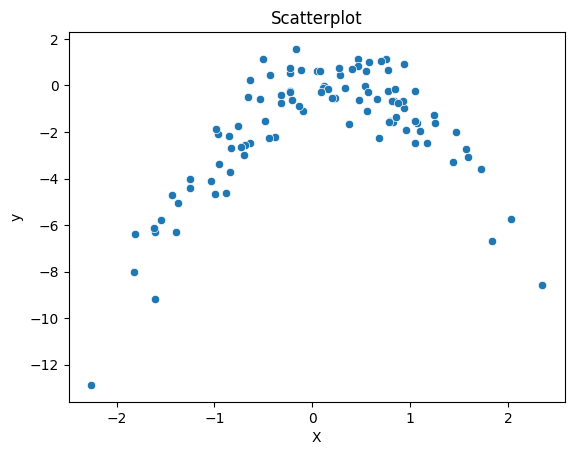

,X,Y
0,1.435437,-3.295519
1,1.726910,-3.588740
2,-0.641061,0.246740
3,0.834131,-0.669660
4,0.555849,-1.097846
...,...,...
95,0.842386,-0.134066
96,0.405598,0.722133
97,0.685620,-2.239618
98,1.049533,-2.476283


In [ ]:
#a
np.random.seed(1)
n = 100
x = np.random.randn(n)
y = x - 2 * x**2 + np.random.randn(n)

data = pd.DataFrame({'X': x, 'Y': y})

#b
print(f'n is the number of rows in our data = {n}')
print(f'p is the number of features in the data = {1}')

#c

plt.scatter(data['X'], data['Y'], alpha=0.7)
plt.title("Scatterplot of X vs. Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



pd.DataFrame({'X': X, 'Y': y})

Theres obviously a non linearn relationship in X and Y.
In order to capture the information of X in Y we need to add a cuadratic term to the model.

In [ ]:
X = data['X'].values.reshape(-1, 1)
y = data['Y'].values
loo = LeaveOneOut()
max_degree = 4
loocv_errors = []


for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    errors = []
    for train_index, test_index in loo.split(X_poly):

        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]


        model = LinearRegression()
        model.fit(X_train, y_train)


        y_pred = model.predict(X_test)
        errors.append((y_test - y_pred) ** 2)


    loocv_errors.append(np.mean(errors))

print("LOOCV Errors (Original Data):", loocv_errors)

LOOCV Errors (Original Data): [3.991839975232241, 4.087936377679686, 4.169970735442242, 4.240768879160927]


We see that the best model is the linear model... super weird not expected at all. Lets model the same data but with a new seed.

In [ ]:
np.random.seed(2024)
x_new = np.random.randn(n)
y_new = x_new - 2 * x_new**2 + np.random.randn(n)

data_new = pd.DataFrame({'X': x_new, 'Y': y_new})

X_new = data_new['X'].values.reshape(-1, 1)
y_new = data_new['Y'].values
loocv_errors_new = []

for degree in range(1, max_degree + 1):

    poly = PolynomialFeatures(degree=degree)
    X_poly_new = poly.fit_transform(X_new)

    errors = []
    for train_index, test_index in loo.split(X_poly_new):

        X_train, X_test = X_poly_new[train_index], X_poly_new[test_index]
        y_train, y_test = y_new[train_index], y_new[test_index]


        model = LinearRegression()
        model.fit(X_train, y_train)


        y_pred = model.predict(X_test)
        errors.append((y_test - y_pred) ** 2)


    loocv_errors_new.append(np.mean(errors))

print("\nLOOCV Errors (New Data):", loocv_errors_new)


results_new = []

for degree in range(1, max_degree + 1):

    poly = PolynomialFeatures(degree=degree)
    X_poly_new = poly.fit_transform(X_new)


    model = sm.OLS(y_new, sm.add_constant(X_poly_new))
    results_new.append(model.fit())


print("\nP-Values (New Data):")
for degree, result in enumerate(results_new, start=1):
    print(f"Degree {degree}:")
    print(result.pvalues)


LOOCV Errors (New Data): [8.404665993417359, 1.071367577826347, 1.090687790724168, 1.1341239101318932]

P-Values (New Data):
Degree 1:
[7.57811811e-10 6.20232622e-06]
Degree 2:
[2.71747822e-01 8.81024276e-21 1.58193106e-44]
Degree 3:
[3.10240757e-01 5.20590605e-09 4.20571641e-43 3.98485813e-01]
Degree 4:
[3.95135327e-01 1.04346317e-08 2.13390245e-16 4.27909431e-01
 9.87272009e-01]


Now we se a realistic result where the lowest errors is produced by the cuadratic model.